# Assignment 1: Classifying handwritten digits using probability theory

# 1. Introduce the problem in your own words. You should mention what data we use, what we want to do with it and how we will do it. Explain with your own words the Naive Bayes classifier, it's assumptions and how this can classify the digits $0-9$.

In this notebook, we will classify handwritten digits with the Naive Bayes classifier. 
We use the mnist dataset containing 70.000 binary black and white images with the digits 0-9. 

The images are 28x28 pixels which we will transform into a 784 length vector so that we can interpret each image as 784 different features.
The images are split into two sets; a train and a test set used to evaluate model performance.

Naive Bayes is a probabilistic approach based on Bayes theorm.
Bayes theorem is given by the formula
$$P(y|X)=\frac{P(X|y)\cdot P(y)}{P(X)}$$
where in our case, $P(y|X)$ is the probability of an image having the label $y$ given the $X$ pixels.

The problematic term is $P(X|y)$ in the numerator. Calculating this term is very computational expensive if we assume depence between the pixels, which one should to be precise.
Naive Bayes solves this problem by assuming indepence between each pixel. This assumption is flawed and is the reason for calling it naive. However, when the pixels are assumed independent, the numerator can be easily calculated as the product of the probability of each pixel.

Multiplying many probabilities results in very small values as any probability is between zero and 1. By applying the logarithm to each probability, we can add the logarithmic probabilities together instead. 
This term is also called the likelihood and when using the logarithm trick, we call it the log likelihood.

We train a probability model $P(y|X)$ for each $y$ so that we can compare the results and make our prediction according to the model which returns the highest probability

In [23]:
from __future__ import division
import numpy as np
import pylab as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.metrics import plot_confusion_matrix

# 2. Load the data

In [24]:
# load data
data = np.load("mnist_bin.npz") # insert your answer here

# get vector representation of binary digits
X = data['X']

# get binary labels
y = data['y']

print('The shape of X is (%d, %d)' % X.shape)
print('The shape of y is (%d)\n' % y.shape)

# Dimensions
N, D = X.shape

print('Number of images: %d' % N)
print('Number of pixels: %d' % D)


The shape of X is (70000, 784)
The shape of y is (70000)

Number of images: 70000
Number of pixels: 784


#### Run the code beneath. It plots 10 images of each digit. 


In [25]:
def show_image(x, title="", clim=None, cmap=plt.cm.gray, colorbar=False):
    ax = plt.gca()
    im = ax.imshow(x.reshape((28, 28)), cmap=cmap, clim=clim)
    
    if len(title) > 0:
        plt.title(title)
        
    plt.axis('off')
    
    if colorbar:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)

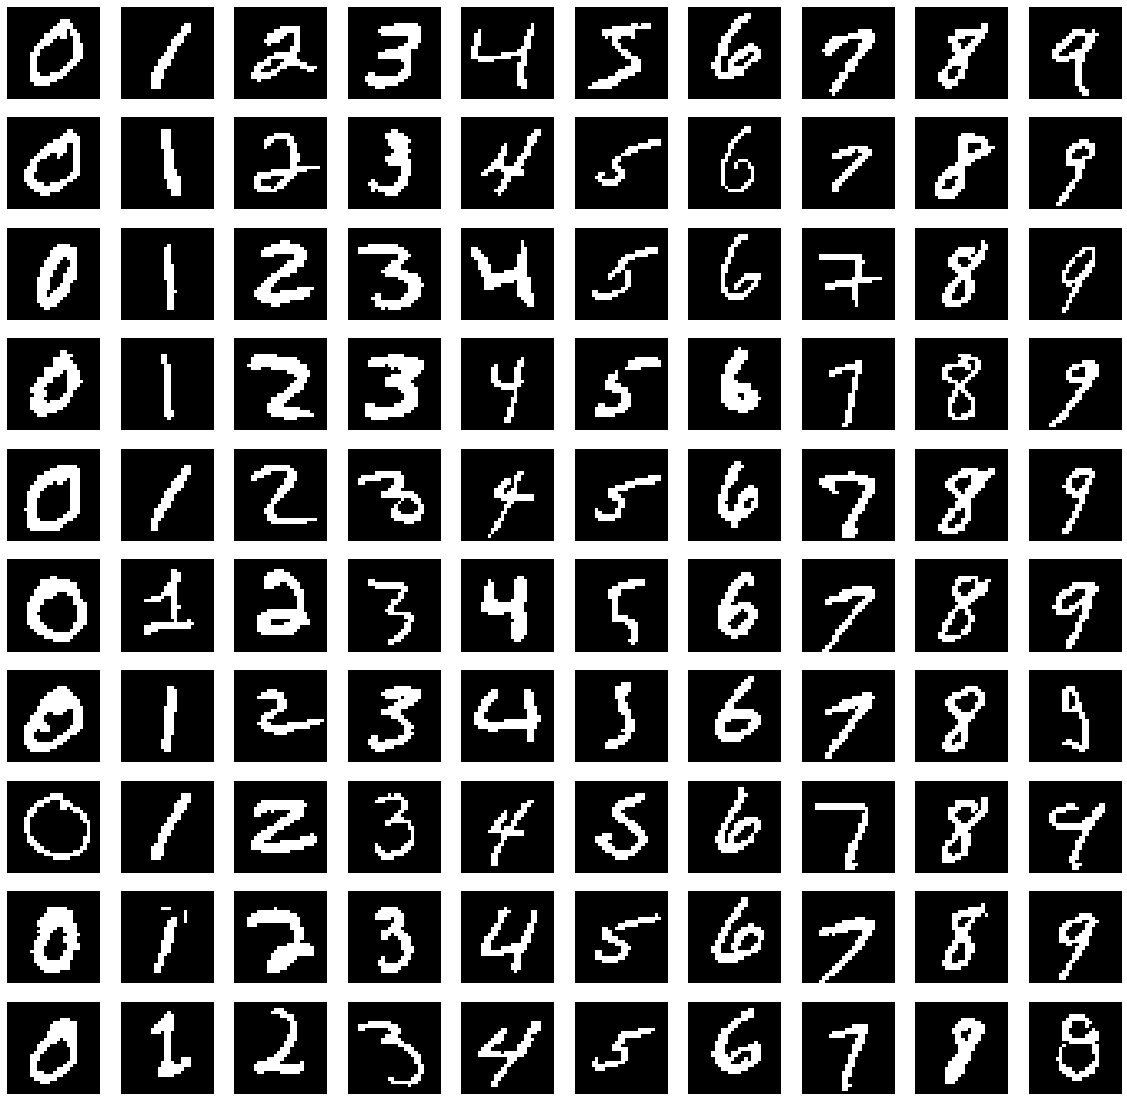

In [26]:
num_images_per_row  = 10
num_labels          = 10

plt.figure(figsize=(20, 20))
counter             = 1
for i in range(num_labels):
    for l in range(num_images_per_row):
        plt.subplot(num_labels, num_images_per_row, counter)

        all_images_belonging_to_class_l = X[y==l,:]
        one_images_belonging_to_class_l = all_images_belonging_to_class_l[i]
        
        show_image(one_images_belonging_to_class_l)  
        counter += 1


# 3. Explain what a training set is, what a test set is and why we as data scientists *always* split data into test/train before doing any modelling. What do we want to avoid?

A training set is the data points we use to train our model. The test set is data that the model hasn't been trained on but is used to evaluate model performance. 
We do this to avoid overfitting the model such that it fails to generalize to real world data.

In [27]:
N = len(X)
N_train = int(0.8*N)
N_test = N - N_train

# set random seed:
np.random.seed(0) # don't change this :-)

# create a random permutation for splitting into training and test
randperm = np.random.permutation(N)

# split into training and test
train_idx = randperm[:N_train]
test_idx = randperm[N_train:]
Xtrain, Xtest = X[train_idx, :], X[test_idx, :]
ytrain, ytest = y[train_idx], y[test_idx]

print('Total number of images:\t\t%d' % N)
print('Number of training images:\t%d' % N_train)
print('Number of test images:\t\t%d' % N_test)

Total number of images:		70000
Number of training images:	56000
Number of test images:		14000


# 4. Implement/change the code to handle all digits. 
### Fitting the Naı̈ve-Bayes model to training set: the prior

The code beneath is taken from Exercise 1 and it only handles digits 0 and 1. Change the code to handle all digits.

In [28]:
counts = []
for i in range(10):
    count = np.sum(ytrain == i)
    counts.append(count)

counts = np.array(counts) 


# compute prior prob.: P(Y=0) = count_zeros/N_train and P(Y=1) = count_ones/N_train

# let's store both probabilities in a vector
prior = counts / N_train

print('Number of training digits:%d' % N_train)
for i in range(10):
    print(f"Number of {i}s: {counts[i]}")
print()

for i in range(10):
    print("Prior probability of seeing a {}:\tp(y = {}) = {}/{} = {:.2f}".format(i,i,counts[i],N_train,prior[i]))

Number of training digits:56000
Number of 0s: 5573
Number of 1s: 6280
Number of 2s: 5592
Number of 3s: 5700
Number of 4s: 5480
Number of 5s: 5063
Number of 6s: 5507
Number of 7s: 5778
Number of 8s: 5449
Number of 9s: 5578

Prior probability of seeing a 0:	p(y = 0) = 5573/56000 = 0.10
Prior probability of seeing a 1:	p(y = 1) = 6280/56000 = 0.11
Prior probability of seeing a 2:	p(y = 2) = 5592/56000 = 0.10
Prior probability of seeing a 3:	p(y = 3) = 5700/56000 = 0.10
Prior probability of seeing a 4:	p(y = 4) = 5480/56000 = 0.10
Prior probability of seeing a 5:	p(y = 5) = 5063/56000 = 0.09
Prior probability of seeing a 6:	p(y = 6) = 5507/56000 = 0.10
Prior probability of seeing a 7:	p(y = 7) = 5778/56000 = 0.10
Prior probability of seeing a 8:	p(y = 8) = 5449/56000 = 0.10
Prior probability of seeing a 9:	p(y = 9) = 5578/56000 = 0.10


### Fitting the Naı̈ve-Bayes model to training set: the likelihood

In [29]:
Xtrain_numbers = []
for i in range(10):
    Xtrain_numbers.append(Xtrain[ytrain == i, :])

# fit models
p_numbers = []
for i in range(10):
    p_numbers.append(np.mean(Xtrain_numbers[i],axis=0))

In [30]:
# This code should be sufficient, i.e. don't change this.
def log_likelihood(x_new, p_digit):
    pixel_log_lik = x_new*np.log(p_digit + 1e-16) + (1-x_new)*np.log(1-p_digit)
    return np.sum(pixel_log_lik)
    
image_idxs_to_be_classified = [0,10,510,810]
for image_idx in image_idxs_to_be_classified:
    x_new = Xtrain[image_idx]
    print('Image idx: %d (label=%d)' % (image_idx, ytrain[image_idx]))
    
    for i in range(10):
        print('p(x_new | Y=%d): %3.2e' % (i ,np.exp(log_likelihood(x_new, p_numbers[i]))))
    print('\n')

Image idx: 0 (label=0)
p(x_new | Y=0): 1.17e-85
p(x_new | Y=1): 1.53e-243
p(x_new | Y=2): 3.91e-119
p(x_new | Y=3): 5.44e-123
p(x_new | Y=4): 1.82e-118
p(x_new | Y=5): 3.26e-109
p(x_new | Y=6): 6.55e-99
p(x_new | Y=7): 6.98e-188
p(x_new | Y=8): 1.24e-109
p(x_new | Y=9): 1.08e-134


Image idx: 10 (label=1)
p(x_new | Y=0): 3.40e-122
p(x_new | Y=1): 2.94e-34
p(x_new | Y=2): 5.53e-75
p(x_new | Y=3): 1.24e-76
p(x_new | Y=4): 2.29e-86
p(x_new | Y=5): 2.74e-76
p(x_new | Y=6): 1.37e-112
p(x_new | Y=7): 1.06e-83
p(x_new | Y=8): 7.47e-68
p(x_new | Y=9): 6.80e-81


Image idx: 510 (label=1)
p(x_new | Y=0): 2.39e-125
p(x_new | Y=1): 5.00e-34
p(x_new | Y=2): 3.51e-73
p(x_new | Y=3): 1.31e-78
p(x_new | Y=4): 7.04e-96
p(x_new | Y=5): 9.44e-78
p(x_new | Y=6): 3.88e-88
p(x_new | Y=7): 3.38e-107
p(x_new | Y=8): 7.98e-68
p(x_new | Y=9): 6.62e-90


Image idx: 810 (label=6)
p(x_new | Y=0): 6.20e-151
p(x_new | Y=1): 7.56e-150
p(x_new | Y=2): 1.27e-89
p(x_new | Y=3): 2.06e-128
p(x_new | Y=4): 4.94e-108
p(x_ne

### Implementing Bayes's theorem

In [31]:
def compute_posterior_prob(x_new):
    log_lik_numbers = []
    for i in range(10):
        log_lik_numbers.append(log_likelihood(x_new, p_numbers[i]))
        

    # exponentiate
    lik_numbers = []
    for i in range(10):
        lik_numbers.append(np.exp(log_lik_numbers[i]))
    # extend code here

#     # implement eq. (4)
    term_numbers = []
    for i in range(10):
        term_numbers.append(lik_numbers[i]*prior[i])
    evidence = np.sum(term_numbers)
    
    post_prob_numbers = []
    for i in range(10):
        post_prob_numbers.append(term_numbers[i]/evidence)

    posterior = np.array(post_prob_numbers)
    return posterior


### A simple classification rule: take the class with largest posterior probability

In [32]:
def classify(x):
    posterior = compute_posterior_prob(x)
    predicted_label = np.argmax(posterior)
    return predicted_label
    

### Change this code to classify some of the images 

p(Y|x) = (1.0)
True label: 2
Predicted label: 6
p(Y|x) = (1.0)
True label: 7
Predicted label: 9
p(Y|x) = (1.0)
True label: 7
Predicted label: 7
p(Y|x) = (1.0)
True label: 3
Predicted label: 3
p(Y|x) = (1.0)
True label: 1
Predicted label: 1
p(Y|x) = (1.0)
True label: 3
Predicted label: 3
p(Y|x) = (1.0)
True label: 1
Predicted label: 1
p(Y|x) = (1.0)
True label: 7
Predicted label: 7
p(Y|x) = (1.0)
True label: 3
Predicted label: 3
p(Y|x) = (0.7)
True label: 7
Predicted label: 8


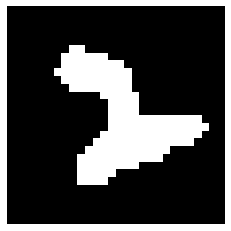

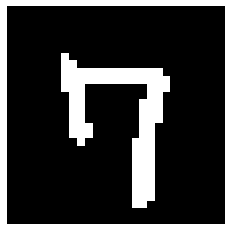

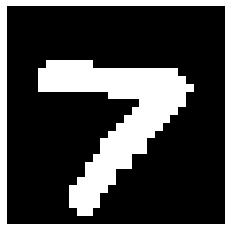

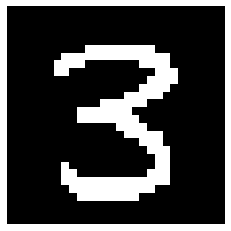

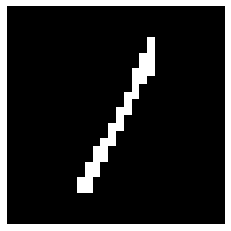

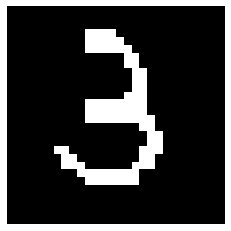

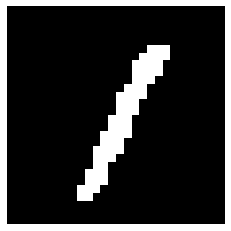

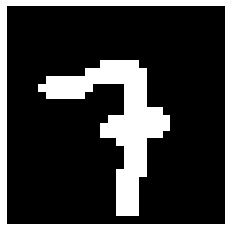

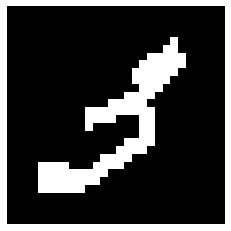

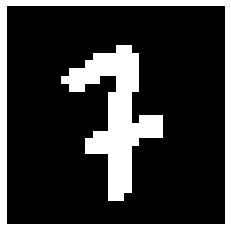

In [33]:
# Classifies the first 10 images in the test set
for i in range(10):
    f = plt.figure()
    
    # compute posterior probabilities
    posterior = compute_posterior_prob(Xtest[i, :])
    
    # get true label and predicted label
    true_label = ytest[i]
    predicted_label = classify(Xtest[i, :])
    
    # show image 
    show_image(Xtest[i, :])
    
    # Print result
    print('p(Y|x) = (%2.1f)' % np.max(posterior))
    print("True label:",true_label)
    print("Predicted label:",predicted_label)
    


### Let's compute the training and test errors

In [34]:
ytrain_hat = np.array([classify(x) for x in Xtrain])
ytest_hat = np.array([classify(x) for x in Xtest])

In [35]:
mean_train_acc = np.mean(ytrain_hat == ytrain)
mean_test_acc = np.mean(ytest_hat == ytest)
print('Training accuracy:\t%4.3f' % mean_train_acc)
print('Test accuracy:\t\t%4.3f' % mean_test_acc)

Training accuracy:	0.840
Test accuracy:		0.840


# 5. Compute the confusion matrix and explain what it shows.

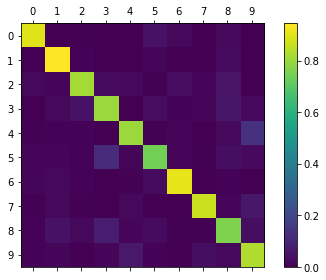

In [36]:
from sklearn.metrics import confusion_matrix
labels = list(range(10))
pred = np.array([classify(x) for x in Xtest])
cm = confusion_matrix(ytest, pred, labels,normalize="true")
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
fig.colorbar(cax)
ax.set_xticks(labels)
ax.set_yticks(labels)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.tight_layout()
plt.show()

The confusion matrix shows the accuracy of the model on the test set on the different classes.
The vertical axis shows the actual labels of the test data while the horizontal axis shows the model prediction.
Each square is thus a label/prediction pair. Therefore, the squares in the diagonal shows the percentage of cases where the model correctly predicted the label. The more yellow a square is, the more often the label/prediction pair occured.
We can see that the model performance is quite good since the diagonal has a mostly bright yellow color. 
An outlier is the label 5 where the model quite often predicts 3 instead.
Another one is the label 4 which is often predicted as 9 (roughly 20%).

# 6. Error analysis: find images that are misclassified by the system.  Are there common characteristics among the images that are misclassified?

Generally, some of the factors that lead to misclassification are: unfinished numbers, squeezed numbers in either x- or y-axis, numbers that in general look a bit like each other (4 and 9, 5 and 8) and numbers written with artifacts or other "errors".

Another source of misclassification is the assumption of the Naive Bayes classifier. Thus, images that share a lot of the same pixels are easily interchanged.

The code below shows 10 misclassified images of each digit along with the model prediction. 
We see that numbers that share a key characteristic such as 1, 4, 7, and 9 all with a central straight line are frequently confused.
We same goes for 0, 2, 3, 5 and 8 which all share some curved edges. 

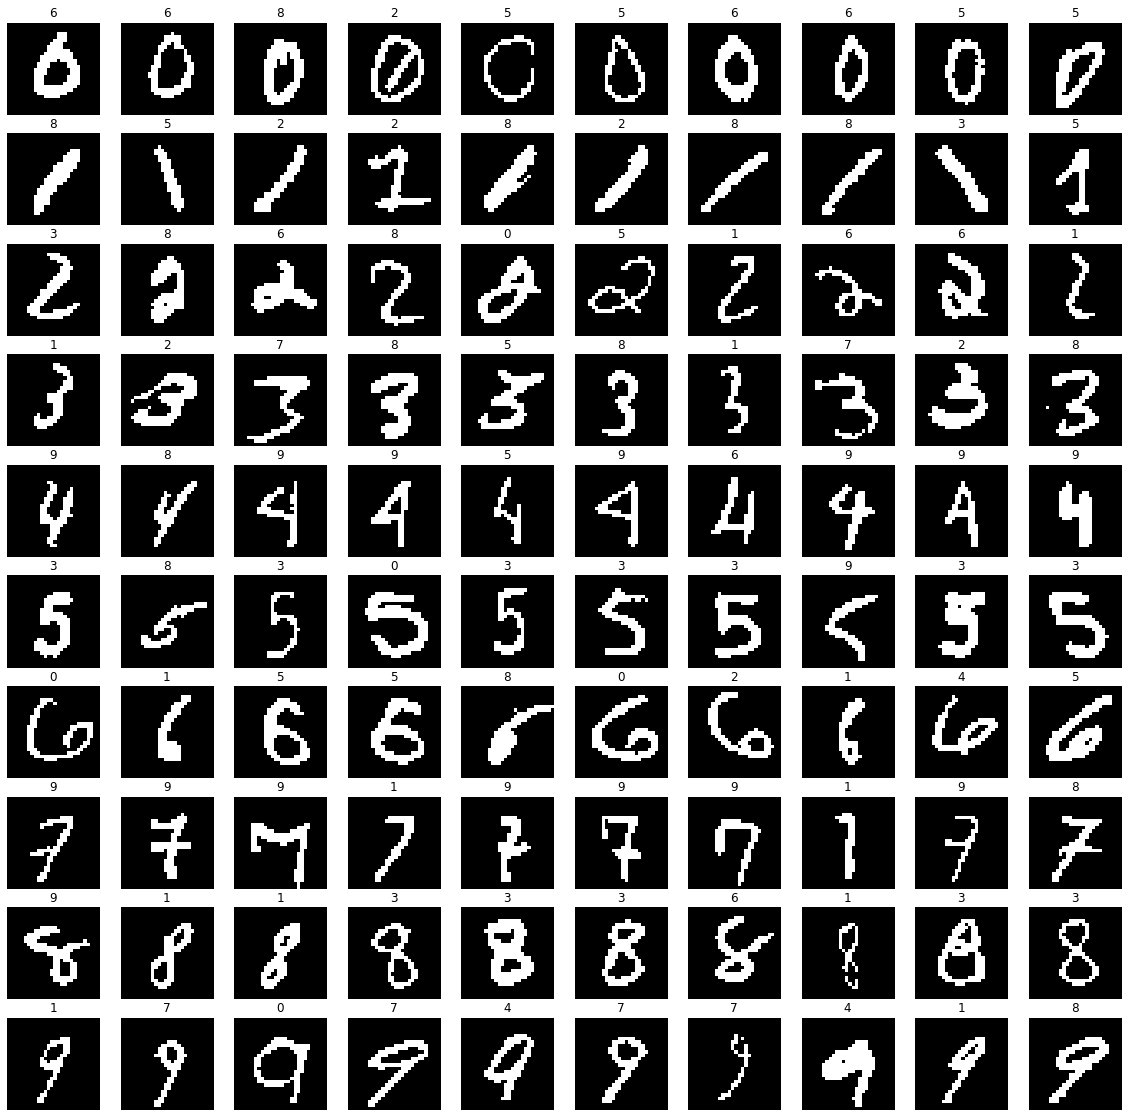

In [37]:
missedX = Xtrain[ytrain != ytrain_hat]
missedy = ytrain[ytrain != ytrain_hat]
missedy_hat = ytrain_hat[ytrain != ytrain_hat]


num_images_per_row  = 10
num_labels          = 10

plt.figure(figsize=(20, 20))
counter = 1
for i in range(num_labels):
    for l in range(num_images_per_row):
        plt.subplot(num_labels, num_images_per_row, counter)
        plt.title(f"{missedy_hat[missedy==i][counter]}")

        missclassified = missedX[missedy==i][counter]
        
        show_image(missclassified)  
        counter += 1


def show_errors(i):
    plt.imshow(missedX[i].reshape((28,28)))
    plt.show()
    print(f"Prediction: {missedy_hat[i]}")
    print(f"Actual: {missedy[i]}")